### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

Il paese con il maggior consumo di alcohol è Belarus


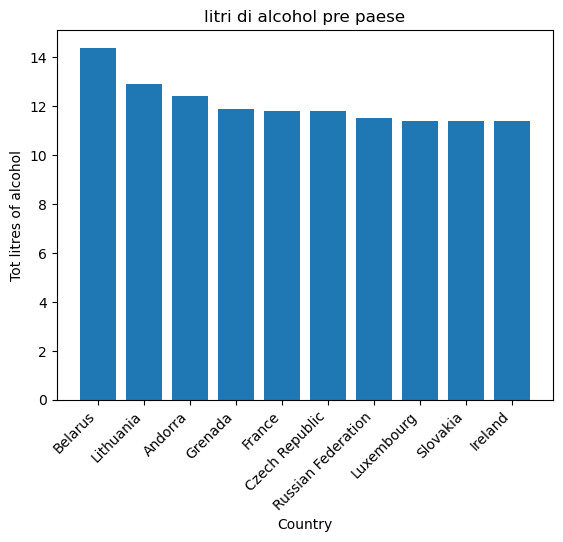

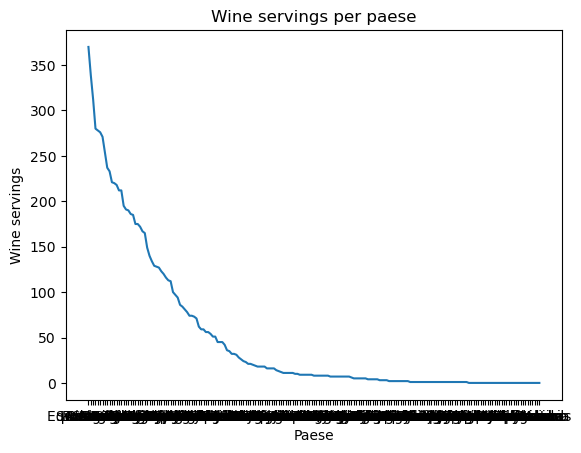

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")
#1
df1 = df.sort_values(by='total_litres_of_pure_alcohol', ascending=False).head(10)
#2
media_birra = df1['beer_servings'].mean()
media_vino = df1['wine_servings'].mean()
media_distillati = df1['spirit_servings'].mean()
#3
df['total_servings/3'] = df[['beer_servings','wine_servings','spirit_servings']].mean(axis=1)
#4
df['total_litres_of_pure_alcohol'].idxmax() #indice del paese con consumo alcohol maggiore
paese_max_alcohol = df.iloc[15]['country']
print("Il paese con il maggior consumo di alcohol è {}".format(paese_max_alcohol))
#5
df[df['beer_servings']>100]
plt.bar(df1['country'],df1['total_litres_of_pure_alcohol'].values)
plt.title('litri di alcohol pre paese')
plt.ylabel('Tot litres of alcohol')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right') 
plt.show()
df2 = df.sort_values(by='wine_servings', ascending=False)
plt.plot(df2['country'], df2['wine_servings'].values)
plt.title('Wine servings per paese')
plt.xlabel('Paese')
plt.ylabel('Wine servings')
plt.show()


### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

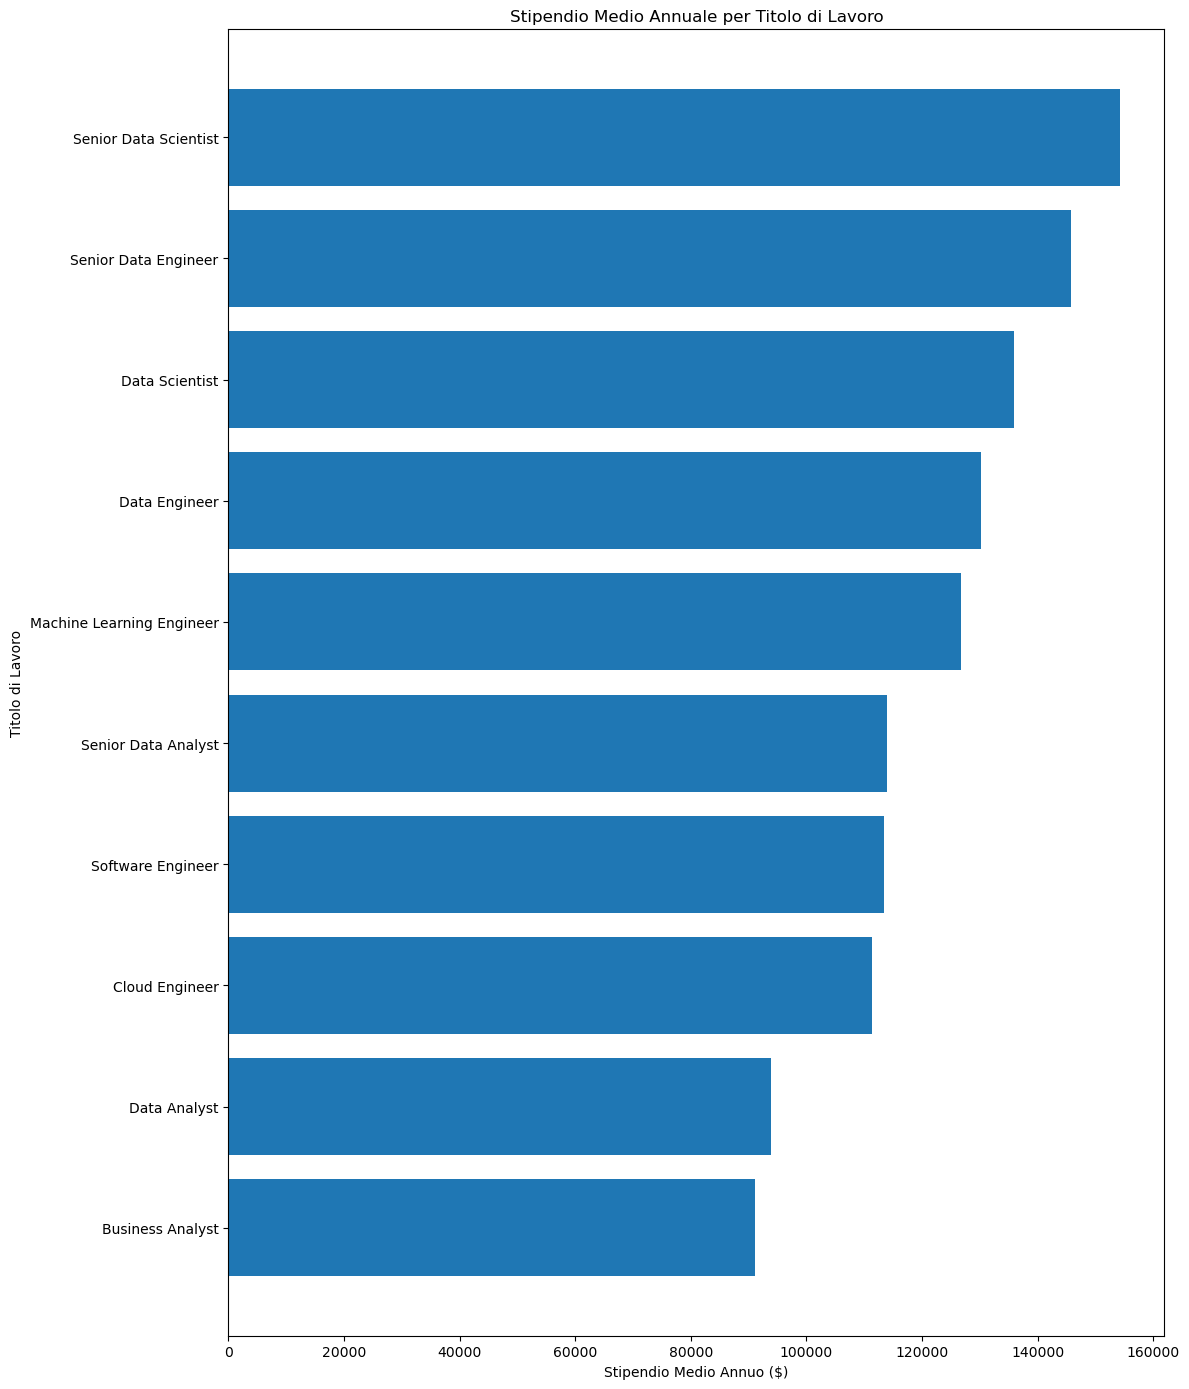

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Carica il dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Conversione della data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
job_avg = df.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,14))
plt.barh(job_avg.index, job_avg.values)
plt.title('Stipendio Medio Annuale per Titolo di Lavoro')
plt.xlabel('Stipendio Medio Annuo')
plt.ylabel('Titolo di Lavoro')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

